# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

** Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

** R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [29]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

import numpy as np

#Slope & Y-intercept Functions
def calc_slope(xs,ys):
    '''
    Returns best fit slope m^ for xs and ys
    '''
    mean_x = np.mean(xs)
    mean_y = np.mean(ys)
    mean_xy = np.mean( np.array(xs) * np.array(ys) )
    x_sq = np.array(xs)**2
    
    # (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))
    return ((mean_x*mean_y) - mean_xy) / (mean_x**2 - np.mean(x_sq))


def best_fit(xs,ys):
    '''
    Returns best fit line for inputs xs and ys as a tuple with m and y-intercept
    '''
    mean_x = np.mean(xs)
    mean_y = np.mean(ys)
    m = calc_slope(xs,ys)
    y_int = mean_y - m*mean_x
    
    return (m, y_int)
    

#R Squared Functions
def sq_err(y_a, y_b):
    """
    input
    y_a : true y values
    y_b : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    return np.sum((y_a - y_b)**2)


def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    
    # make an array of mean values to be used for SStot, SSexp
    y_mean = np.full(shape=len(y_real), fill_value=y_real.mean())
    
    SS_tot = sq_err(y_real, y_mean)
    SS_res = sq_err(y_real, y_predicted)
    
    return 1 - (SS_res / SS_tot)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56*X + 6.33


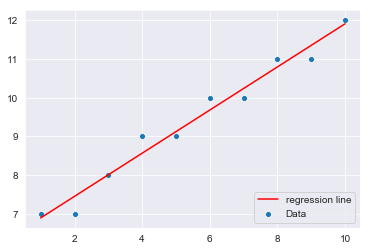

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

m, y_int = best_fit(X,Y)
Y_predicted = m*X + y_int
r_sq = r_squared(Y, Y_predicted)

print("Basic Regression Diagnostics\n----------------------------")
print("Slope: {:.2f}".format(m))
print("Y-intercept: {:.2f}".format(y_int))
print("R-Squared: {:.2f}".format(r_sq))
print("----------------------------")
print("Model: Y = {:.2f}*X + {:.2f}".format(m,y_int))

sns.scatterplot(X,Y, label="Data")
plt.plot(X,Y_predicted,label="regression line", color='red')
plt.legend(loc='lower right');

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


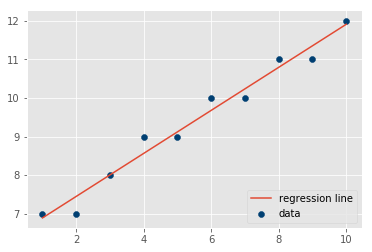

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

8.842424242424244


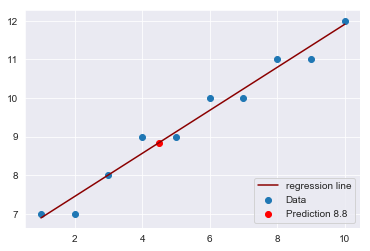

In [59]:
# Make prediction using given value and visualize on the scatter plot
x_to_predict = 4.5
y_pred = m*x_to_predict + y_int
print(y_pred)

plt.scatter(X,Y, label="Data")
plt.plot(X,Y_predicted,label="regression line", color='darkred')
plt.scatter(x_to_predict,y_pred, label="Prediction {:.1f}".format(y_pred), color='red')
plt.legend(loc='lower right');


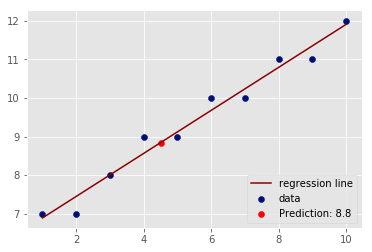

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [60]:
import pandas as pd

In [70]:
df = pd.read_csv('heightWeight.csv')
df

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192
5,58,125
6,72,195
7,73,205
8,58,115
9,74,210


Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54*X + -204.48


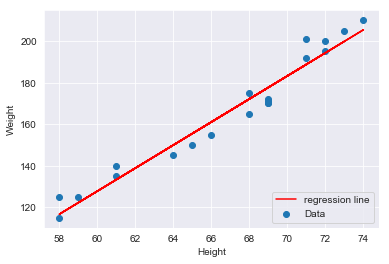

In [72]:
#Height is independent variable (x), Weight is the dependent variable (y)

#Calculate Regression Values and print
m, y_int = best_fit(df.height,df.weight)
weight_predicted = m*df.height + y_int
r_sq = r_squared(df.weight, weight_predicted)

print("Basic Regression Diagnostics\n----------------------------")
print("Slope: {:.2f}".format(m))
print("Y-intercept: {:.2f}".format(y_int))
print("R-Squared: {:.2f}".format(r_sq))
print("----------------------------")
print("Model: Y = {:.2f}*X + {:.2f}".format(m,y_int))

#Plot data and regression line
plt.scatter(df.height,df.weight, label="Data")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(df.height,weight_predicted,label="regression line", color='red')
plt.legend(loc='lower right');